# Importacion de librerías

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns',None)

## Lectura de los datos

In [3]:
rankin_universidades_data_file_path = 'RankinUniversidadesDelMundo.csv'

In [4]:
df = pd.read_csv(rankin_universidades_data_file_path, sep=';')

In [33]:
df

,Rank,University name,locationLocation,Number of Studnet,Number of student per staffs,International Student,female,male,Estudiantes femeninos,Estudiantes masculinos
0,1,University of Oxford,United Kingdom,20965,10.6,0.42,0.48,0.52,10063,10901
1,2,Harvard University,United States,21887,9.6,0.25,0.50,0.50,10943,10943
2,3,University of Cambridge,United Kingdom,20185,11.3,0.39,0.47,0.53,9486,10698
3,4,Stanford University,United States,16164,7.1,0.24,0.46,0.54,7435,8728
4,5,Massachusetts Institute of Technology,United States,11415,8.2,0.33,0.40,0.60,4566,6849
...,...,...,...,...,...,...,...,...,...,...
2340,2341,York St John University,United Kingdom,6315,18.6,0.12,0.65,0.35,4104,2210
2341,2342,"Yusuf Maitama Sule University, Kano",Nigeria,1288,33.0,0.00,0.48,0.52,618,669
2342,2343,Zhytomyr Polytechnic State University,Ukraine,3869,15.4,0.01,0.34,0.66,1315,2553
2343,2344,Ziauddin University,Pakistan,4906,8.8,0.01,0.63,0.37,3090,1815


## Procesando los datos parte 1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rank                          2345 non-null   object 
 1   University name               2345 non-null   object 
 2   locationLocation              2234 non-null   object 
 3   Number of Studnet             2345 non-null   object 
 4   Number of student per staffs  2344 non-null   float64
 5   International Student         2345 non-null   object 
 6   Female : male ratio           2255 non-null   object 
dtypes: float64(1), object(6)
memory usage: 128.4+ KB


In [7]:
# Verifique el número de valores únicos de todos los tipos de datos del objeto
df.select_dtypes(include='object').nunique()

Rank                      161
University name          2345
locationLocation          117
Number of Studnet        2260
International Student      79
Female : male ratio        87
dtype: int64

### Analisis de datos Nulos

El objetivo es salvar la mayor cantidad de información, por lo tanto se haran los siguientes pasos
1. se reemplazara el valor null de la columa numerica (Number of student per staffs)
2. se reemplazaran los datos null de (locationLocation) por 'desconocido'
3. para el (female:male ratio) se debe primero arreglar el tipo de datos
    y luego reemplazarla por la media o la mediana

In [8]:
# datos null
df.isna().sum().sort_values(ascending = False)

locationLocation                111
Female : male ratio              90
Number of student per staffs      1
Rank                              0
University name                   0
Number of Studnet                 0
International Student             0
dtype: int64

#### 1. definimos la variable estadisticos_cont para revelar el resumen estadisticos de los datos numericos

In [9]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [10]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Number of student per staffs,2344.0,18.722056,16.3,11.92133,0.4,12.3,16.3,21.9,232.2


In [11]:
df['Number of student per staffs'] = df['Number of student per staffs'].fillna('18,7')

#### 2. se reemplazaran los datos null de (locationLocation) por 'desconocido'

In [12]:
df['locationLocation'] = df['locationLocation'].fillna('desconocido')

#### 3. para el (female:male ratio) se debe primero arreglar el tipo de datos y luego reemplazarla por la media o la mediana

In [13]:
# convertirlo en str para poder manipularlos
df['Female : male ratio'] = df['Female : male ratio'].astype(str)
# Eliminar caracteres no numéricos y conservar solo los primeros 4 dígitos
df['Female : male ratio'] = df['Female : male ratio'].str.replace(r'\D', '', regex=True).str.slice(0, 4)
# Dividir a la mitad y crear columnas separadas para "female" y "male"
df['female'] = df['Female : male ratio'].apply(lambda x: int(x[:2]) if x[:2] else None) / 100.0
df['male'] = df['Female : male ratio'].apply(lambda x: int(x[2:]) if x[2:] else None) / 100.0
# Eliminar la columna 'Female : male ratio'
df.drop(columns = ['Female : male ratio'], inplace = True)

In [14]:
# Reemplazar los valores nulos por la mediana en las columnas 'female', 'male' y 'International Student'
df['female'].fillna(df['female'].median(), inplace=True)
df['male'].fillna(df['male'].median(), inplace=True)
df['International Student'] = df['International Student'].fillna('0.05')

### EDA Datos Numericos

Se desea convertir los datos que son categoricos en (obj) y los numericos (int)
los datos int son: 
* rank
* number of student
* number of studen per staff
* international student
* Female : male ratio

Para poder realizar todo este proceso, debemos limpiar algunos datos numericos

1. Para hacer la siguiente operación debemos convertir principalmente la columna rank en solo numeros
2. El numero de estudiantes tiene numeros float y los convertiremos en mnumeros enteros quitandole la coma
3. Quitarle el simbolo % a la columna international student
4. convertir

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rank                          2345 non-null   object 
 1   University name               2345 non-null   object 
 2   locationLocation              2345 non-null   object 
 3   Number of Studnet             2345 non-null   object 
 4   Number of student per staffs  2345 non-null   object 
 5   International Student         2345 non-null   object 
 6   female                        2345 non-null   float64
 7   male                          2345 non-null   float64
dtypes: float64(2), object(6)
memory usage: 146.7+ KB


In [16]:
# 1. convertir los ranks en numeros del 1 al 2345
df['Rank'] = range(1, 2346)
# 2. Quitar las comas y convertir la columna a tipo numérico
df['Number of Studnet'] = df['Number of Studnet'].str.replace(',', '').astype(int)
# 3.convertir los datos 'international student' a datos str para manipularlos
df['International Student'] = df['International Student'].astype(str)
# Eliminar el símbolo '%' y convertir a tipo float
df['International Student'] = df['International Student'].str.rstrip('%')
df['International Student'] = df['International Student'].apply(lambda x: float(x) / 100.0 if x else None)
# cambiar la columna 'Number of student per staffs' tipo obj por int
df['Number of student per staffs'] = df['Number of student per staffs'].astype(str)
df['Number of student per staffs'] = pd.to_numeric(df['Number of student per staffs'], errors='coerce')

#### boxplot

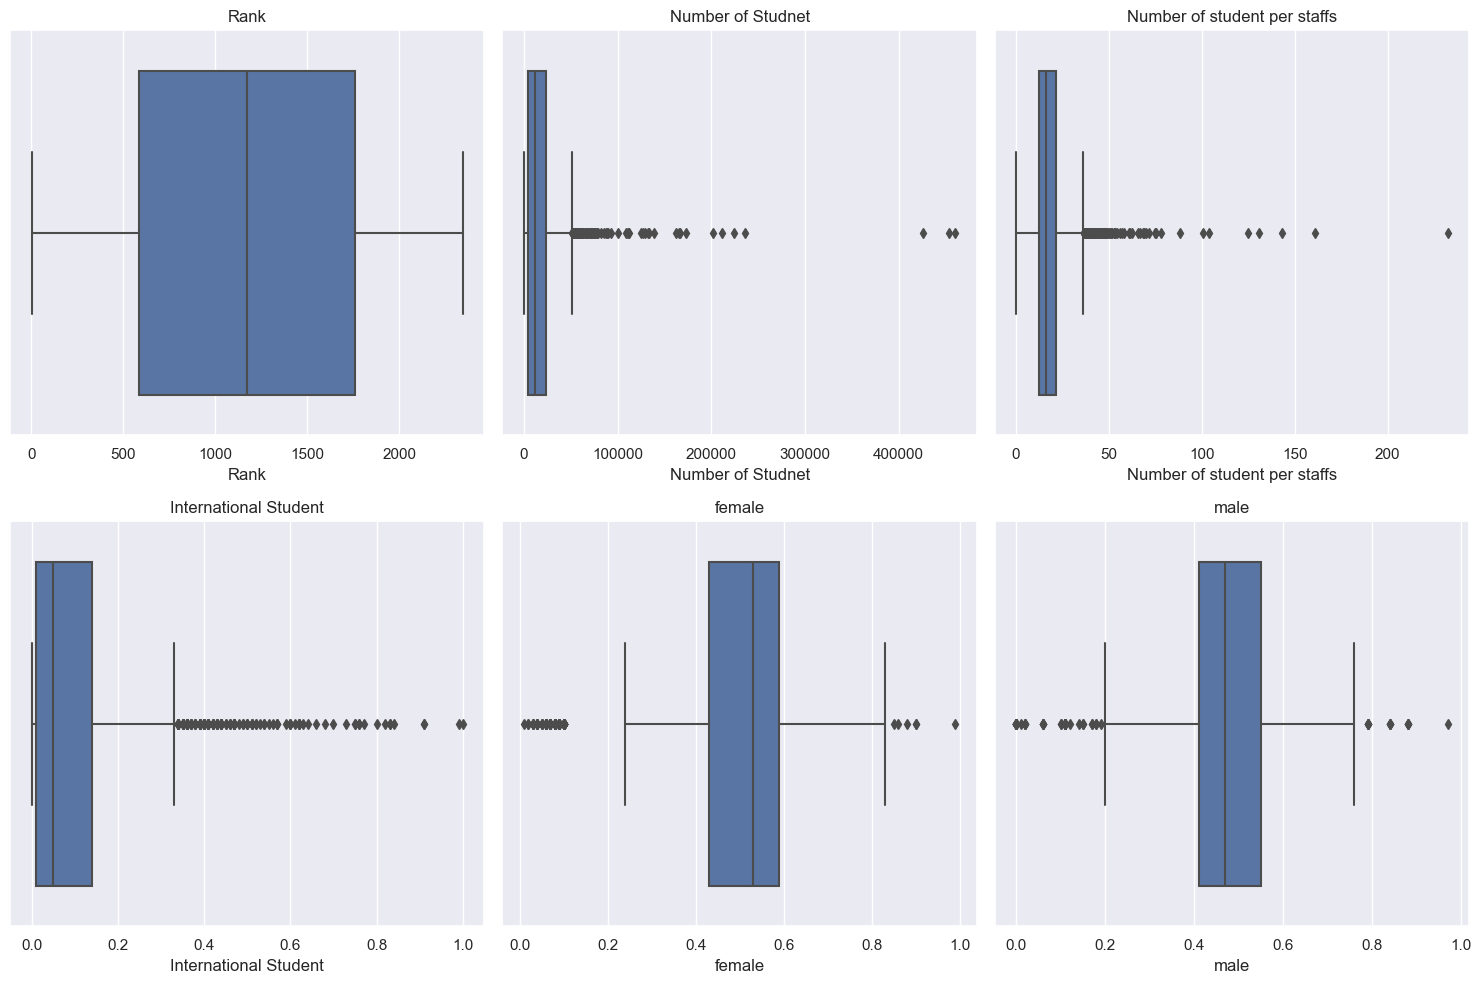

In [17]:
# Obtenga los nombres de todas las columnas con tipo de datos 'int' o 'float' 
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Crear ua figura con subplots/(subfiugra=es un cuadro que dentro habrá una figura)
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Crear una caja de bigotes(box_plot) para cada variable númerica usando seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Elimina cada espacio extra subplot que no necesitas
if num_cols < len(axs):
    for i in range (num_cols, len(axs)):
        fig.delaxes(axs[i])
        
# Ajusta el espacio entre graficos (subplots)
fig.tight_layout()

# Mostrar grafico
plt.show()

#### Histogramas

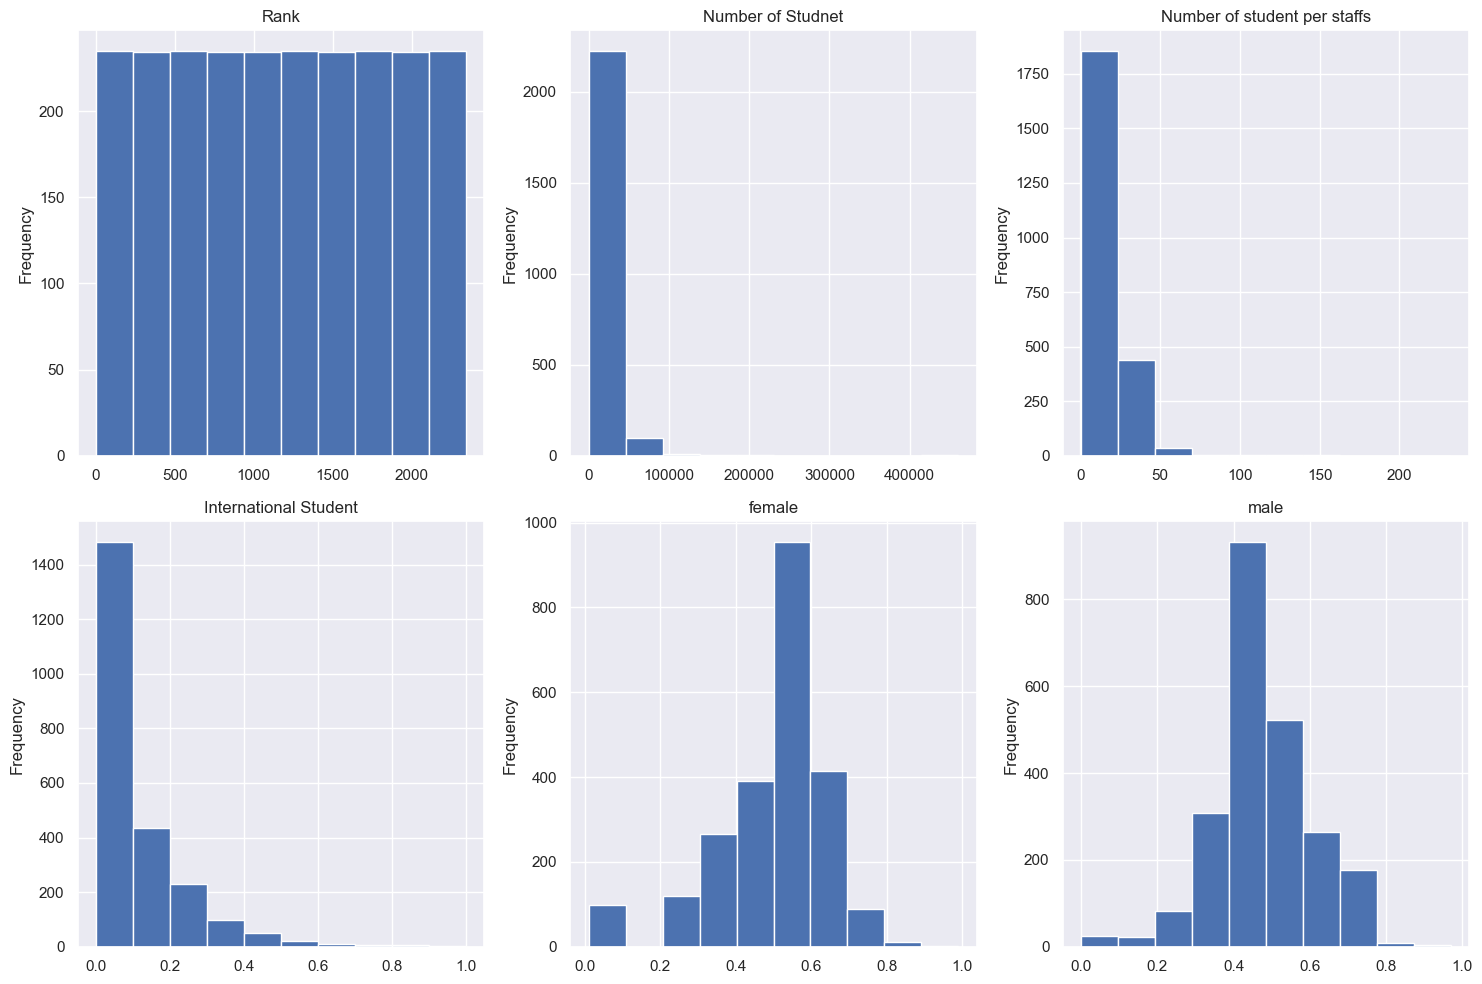

In [18]:
#Escoger los nombres de todas las columnas que contengan datos enteros
int_vars = df.select_dtypes(include=['int','float']).columns.tolist()

#Crear los esopacios para las graficas
num_cols = len (int_vars)
num_rows = (num_cols + 2) //3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Crear un histograma por cada variable entero}
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)
    
# Elimnar los espacios extras y dejar solo los que necesitamos
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
# Ajustar los espacios entre las graficas
fig.tight_layout()        

# mostrar el grafico
plt.show()

### EDA Datos Categoricos

<Axes: >

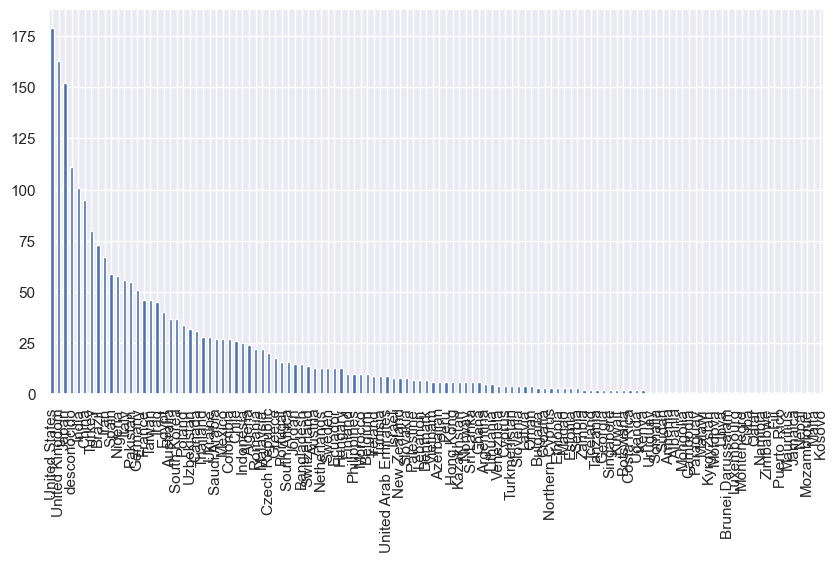

In [19]:
plt.figure(figsize=(10,5))
df['locationLocation'].value_counts().plot(kind='bar')

## Generacion de Insights

1. ¿Hay mas mujeres que hombres en las mejores universidades del mundo?
2. ¿Cual es la universidades que mas tiene estudiantes?
3. ¿Cual es la universidad con mas estudiantes femeninos?
4. ¿Cual es la universidad con mas estudiantes masculinos?
5. ¿En que universidades hay mas estudiantes femeninos que masculinos?
6. ¿En que univerdades hay mas estudiantes masculinos que femeninos?
7. ¿Cual es la universidad que tiene mas estudiantes internacionales?
8. ¿Cual es la universidad que tiene mas estudiantes por staff?

### ¿Cuantas mujeres y hombres hay en las mejores universidades del mundo?

In [20]:
df['Estudiantes femeninos'] = (df['Number of Studnet'] * df['female']).astype(int)
df['Estudiantes masculinos'] = (df['Number of Studnet'] * df['male']).astype(int)

In [21]:
total_est_femeninos = df['Estudiantes femeninos'].sum()
total_est_masculinos = df['Estudiantes masculinos'].sum()

In [22]:
print(f"Estudiantes_femeninos: {total_est_femeninos}")
print(f"Estudiantes_masculinos: {total_est_masculinos}")

Estudiantes_femeninos: 20607196
Estudiantes_masculinos: 19001567


---
<br/><br/>

### ¿Cuantos estudiantes hay en total?

In [23]:
total_estudiantes = df['Number of Studnet'].sum()
print(f"total_estudiantes: {total_estudiantes}")

total_estudiantes: 39955234


---
<br/><br/>

### ¿Cual es la universidad que mas tiene estudiantes?

In [24]:
universidad_max_est = df.loc[df['Number of Studnet'].idxmax(), 'University name']
print(f"Universidad con mas estudiantes: {universidad_max_est}")

Universidad con mas estudiantes: Tribhuvan University


---
<br/><br/>

### ¿Cual es la universidad con mas estudiantes femeninos?

In [25]:
universidad_max_mujeres = df.loc[df['Estudiantes femeninos'].idxmax(), 'University name']
print(f"Universidad con mas estudiantes femeninos: {universidad_max_mujeres}")

Universidad con mas estudiantes femeninos: Payame Noor University


---
<br/><br/>

### ¿Cual es la universidad con mas estudiantes masculinos?

In [26]:
universidad_max_hombres = df.loc[df['Estudiantes masculinos'].idxmax(), 'University name']
print(f"Universidad con mas estudiantes masculinos: {universidad_max_hombres}")

Universidad con mas estudiantes masculinos: Al-Azhar University


---
<br/><br/>

### ¿En cuantas universidades hay mas mujeres que hombres?

In [27]:
universidad_mujeres_max = df[df["female"] > 0.51]['University name']
universidad_mujeres_max = len(universidad_mujeres_max)
print(f"resultado: {universidad_mujeres_max}")

resultado: 1310


---
<br/><br/>

### ¿En cuantas universidades hay mas hombres que mujeres?

In [28]:
universidad_hombres_max = df[df["male"] > 0.51]['University name']
universidad_hombres_max = len(universidad_hombres_max)
print(f"resultado: {universidad_hombres_max}")

resultado: 748


---
<br/><br/>

### ¿Cual es la universidad que tiene mas estudiantes internacionales?

In [29]:
universidad_max_inter = df.loc[df['International Student'].idxmax(), 'University name']
print(f"Universidad con mas estudiantes internacionales: {universidad_max_inter}")

Universidad con mas estudiantes internacionales: Paris University of International Education


---
<br/><br/>

### ¿Cual es la universidad que tiene mas estudiantes por staff?

In [30]:
universidad_max_staff = df.loc[df['Number of student per staffs'].idxmax(), 'University name']
print(f"Universidad con mas estudiantes por staff: {universidad_max_staff}")

Universidad con mas estudiantes por staff: University of South Africa


---
<br/><br/>

## Conclusiones

1. ¿Hay mas mujeres que hombres en las universidades del mundo?
    > si con un total de = 20607196
    
2. ¿Cual es la universidades que mas tiene estudiantes?
    > Tribhuvan University
    
3. ¿Cual es la universidad con mas estudiantes femeninos?
    > Payame Noor University

4. ¿Cual es la universidad con mas estudiantes masculinos?
    > Al-Azhar University
   
5. ¿En que universidades hay mas estudiantes femeninos que masculinos?
    > 1310
    
6. ¿En que univerdades hay mas estudiantes masculinos que femeninos?
    > 748
    
7. ¿Cual es la universidad que tiene mas estudiantes internacionales?
    > Paris University of International Education
   
8. ¿Cual es la universidad que tiene mas estudiantes por staff?
    > University of South Africa


### Graficar las universidades en colombia con un grafico de barras

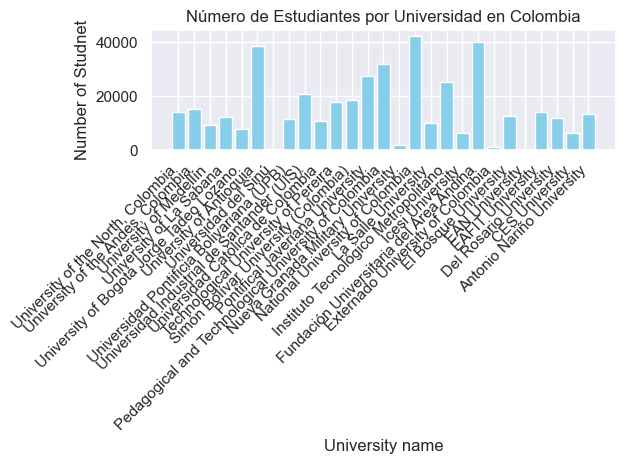

In [31]:
universidades_colombia = df[df['locationLocation'] == 'Colombia']

# Ordenar por cantidad de estudiantes
universidades_colombia = universidades_colombia.sort_values(by='University name', ascending=False)

# Crear la gráfica de barras
plt.bar(universidades_colombia['University name'], universidades_colombia['Number of Studnet'], color='skyblue')
plt.xlabel('University name')
plt.ylabel('Number of Studnet')
plt.title('Número de Estudiantes por Universidad en Colombia')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Exportar el dataframe a un archivo xlsx

In [34]:
output_file = "universidades_del_mundo.xlsx"
df.to_excel(output_file, index=False)